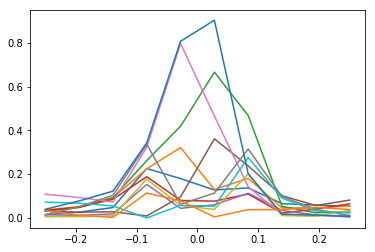

Average is computed over 3 reps.


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
import sys
from os import path

avg_dir='kw_avg_data/'
out_dir='kw_data_files_dis/'

W=40
L=30
Lsc_sw=np.array([10])

# parameters
t=1
mu=0.18
mu_sc= mu+t
Delta=0.03
t_j=1.0
phi=0.0095
gs=0.
gn=0.04
lam=0.5
U0=0.3

def wf_avg(SC_width):
    Lsc=SC_width
    Nrep=400
    N_avg=0
    plt.figure()
    for i_r in range(Nrep):
        fname= out_dir+ 'twosided_phi_%.4f_mu_%.2f_mus_%.2f_D_%.2f_tj_%.2f_W_%d_L_%d_Ls_%d_r_%d.npz' % (phi,mu,mu_sc,Delta,t_j,W,L,Lsc,i_r)       
        if path.exists(fname):
            N_avg += 1
            npzfile = np.load(fname)
            if N_avg==1:
                E_list=npzfile['E_list']
                Pe=npzfile['Pe']
                plt.plot(E_list/Delta,npzfile['Pe'].T)
            else:
                plt.plot(E_list/Delta,npzfile['Pe'].T)
                Pe += npzfile['Pe']
    plt.show()
    if N_avg>0:
        Pe= Pe/N_avg
        fname=avg_dir+ 'avg_phi_%.4f_mu_%.2f_mus_%.2f_D_%.2f_tj_%.2f_W_%d_L_%d_Ls_%d.npz' % (phi,mu,mu_sc,Delta,t_j,W,L,Lsc)
        np.savez(fname, E_list=E_list, Pe=Pe)
        
    return N_avg

for i_L in range(len(Lsc_sw)):
    N_avg= wf_avg(Lsc_sw[i_L])
    print("Average is computed over %d reps." % (N_avg) )

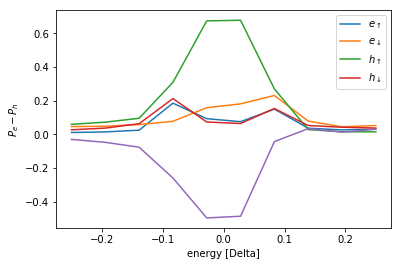

In [9]:
# def wf_plot(Energy_index,SC_width):
def wf_plot(SC_width):
    Lsc=SC_width
    fname=avg_dir+ 'avg_phi_%.4f_mu_%.2f_mus_%.2f_D_%.2f_tj_%.2f_W_%d_L_%d_Ls_%d.npz' % (phi,mu,mu_sc,Delta,t_j,W,L,Lsc)
    npzfile = np.load(fname)
    E_list=npzfile['E_list']
    Pe=npzfile['Pe']

#     i_e=Energy_index
#     if not sys.warnoptions:
#         import warnings
#         warnings.simplefilter("ignore")
#     ind=0
#     fig, axes = pyplot.subplots(nrows=1, ncols=2, figsize=(12, 3))
#     pyplot.subplot(1,2,1)
# #     pyplot.figure()
#     Zmat=abs(wf_arr[ind,::2,i_e])**2-abs(wf_arr[ind,1::2,i_e])**2
#     Zmat_plot=np.fliplr(np.reshape(Zmat,[L,W])).T
#     pos=pyplot.imshow(Zmat_plot, cmap='RdBu_r')#, aspect="auto",
# #                                 interpolation='none')
#     pyplot.clim(-0.3,0.3)
#     pyplot.xlabel("x")
#     pyplot.ylabel("y")
#     pyplot.title(r"$E/\Delta=%.2f$" % (E_list[i_e]/Delta))
#     fig.colorbar(pos)
#     pyplot.subplot(1,2,2)
    plt.figure()
    plt.plot(E_list/Delta, Pe.T)
    plt.legend((r'$e_\uparrow$', r'$e_\downarrow$', r'$h_\uparrow$', r'$h_\downarrow$'))
    plt.xlabel("energy [Delta]")
    plt.ylabel(r"$P_e - P_h$")
    P_diff=Pe[0,:]+Pe[1,:]-Pe[2,:]-Pe[3,:]
    plt.plot(E_list/Delta, P_diff.T)
    plt.show()

# NE=100
# interact(wf_plot, Energy_index=(0,NE-1,1), SC_width=np.array([10]));
wf_plot(10)

In [10]:
# import time

# a=int(time.time())
# print(a)
a=np.random.rand(4)
print(a)
print(a[::-1])

[0.27338381 0.59042786 0.39517732 0.05244464]
[0.05244464 0.39517732 0.59042786 0.27338381]
